In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from datetime import datetime, timedelta

In [2]:
file_path = "Data Assignment.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,Name,Date,No of Leads,Time Spent on LG (in mins)
0,Associate ABC,9-1-2023,2.0,300.0
1,Associate ABC,10-1-2023,1.0,300.0
2,Associate ABC,11-1-2023,5.0,300.0
3,Associate ABC,12-1-2023,4.0,300.0
4,Associate ABC,13-1-2023,5.0,300.0


In [4]:
df.describe()

,No of Leads,Time Spent on LG (in mins)
count,199.000000,206.000000
mean,9.195980,358.067961
std,4.273099,125.856113
min,0.000000,0.000000
25%,6.000000,300.000000
50%,10.000000,360.000000
75%,12.500000,420.000000
max,23.000000,600.000000


# DATA CLEANING

In [5]:
missing_values = df.isnull().sum ()
print("Missing Values:")
print(missing_values)

Missing Values:
Name                           0
Date                           0
No of Leads                   68
Time Spent on LG (in mins)    61
dtype: int64


In [6]:
new_df=df.dropna()

In [7]:
print(new_df)

              Name       Date  No of Leads  Time Spent on LG (in mins)
0    Associate ABC   9-1-2023          2.0                       300.0
1    Associate ABC  10-1-2023          1.0                       300.0
2    Associate ABC  11-1-2023          5.0                       300.0
3    Associate ABC  12-1-2023          4.0                       300.0
4    Associate ABC  13-1-2023          5.0                       300.0
..             ...        ...          ...                         ...
262  Associate KLM   8-5-2023         10.0                       420.0
263  Associate KLM   9-5-2023          9.0                       540.0
264  Associate KLM  10-5-2023          8.0                       360.0
265  Associate KLM  11-5-2023         12.0                       420.0
266  Associate KLM  12-5-2023         11.0                       300.0

[196 rows x 4 columns]


In [8]:
data_types = df.dtypes
print("\nData Types:")
print(data_types)


Data Types:
Name                           object
Date                           object
No of Leads                   float64
Time Spent on LG (in mins)    float64
dtype: object


In [9]:
# Check for outliers using Z-score
z_scores = np.abs(stats.zscore(df[['No of Leads', 'Time Spent on LG (in mins)']]))
outliers = (z_scores > 3).all(axis=1)
print("\nOutliers:")
print(df[outliers])


Outliers:
Empty DataFrame
Columns: [Name, Date, No of Leads, Time Spent on LG (in mins)]
Index: []


In [10]:
statistics = df.describe()
print("\nStatistics:")
print(statistics)


Statistics:
       No of Leads  Time Spent on LG (in mins)
count   199.000000                  206.000000
mean      9.195980                  358.067961
std       4.273099                  125.856113
min       0.000000                    0.000000
25%       6.000000                  300.000000
50%      10.000000                  360.000000
75%      12.500000                  420.000000
max      23.000000                  600.000000


In [11]:
# Display basic information about the DataFrame
print("Data Information:")
print(df.info())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        267 non-null    object 
 1   Date                        267 non-null    object 
 2   No of Leads                 199 non-null    float64
 3   Time Spent on LG (in mins)  206 non-null    float64
dtypes: float64(2), object(2)
memory usage: 8.5+ KB
None


# DATA EXPLORATION,ANALYSIS AND VISUALIZATION

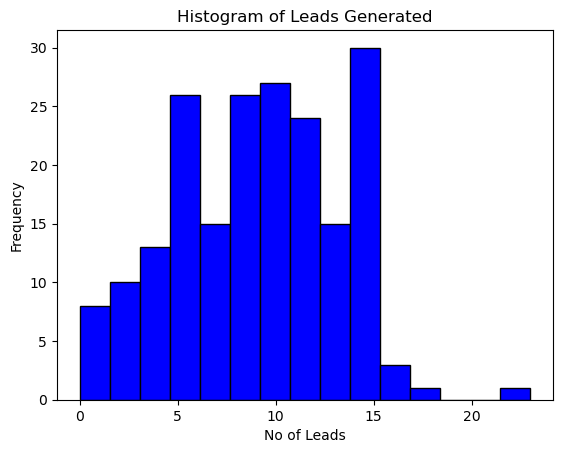

In [12]:
plt.hist(df['No of Leads'], bins=15, color='blue', edgecolor='black')
plt.title('Histogram of Leads Generated')
plt.xlabel('No of Leads')
plt.ylabel('Frequency')
plt.show()

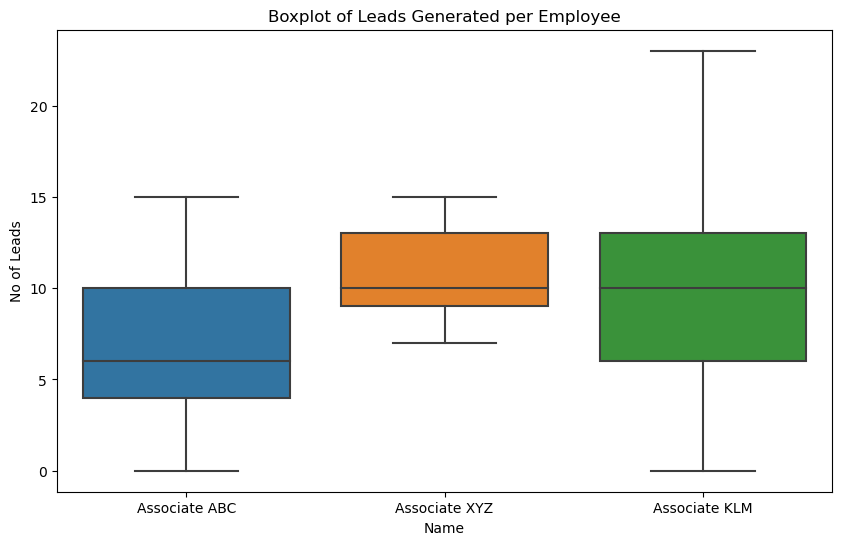

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Name', y='No of Leads', data=df)
plt.title('Boxplot of Leads Generated per Employee')
plt.xlabel('Name')
plt.ylabel('No of Leads')
plt.show()

In [14]:
# Calculate Average Leads Generated per day
df['Date'] = pd.to_datetime(df['Date'])
avg_leads_per_day = df.groupby(['Name', 'Date'])['No of Leads'].mean().reset_index()
avg_leads_per_day = avg_leads_per_day.groupby('Name')['No of Leads'].mean()

In [15]:
# Calculate Average Time Spent per day
avg_time_spent_per_day = df.groupby(['Name', 'Date'])['Time Spent on LG (in mins)'].mean().reset_index()
avg_time_spent_per_day = avg_time_spent_per_day.groupby('Name')['Time Spent on LG (in mins)'].mean()

In [16]:
# Calculate Conversion Rate (Leads Generated per hour)
df['Leads_Per_Hour'] = df['No of Leads'] / (df['Time Spent on LG (in mins)'] / 60)
conversion_rate = df.groupby('Name')['Leads_Per_Hour'].mean()

In [17]:
# Calculate Total Leads Generated over the given time period
total_leads_generated = df.groupby('Name')['No of Leads'].sum()

In [18]:
# Display the calculated KPIs
kpi_df = pd.DataFrame({
    'Average Leads Generated per day': avg_leads_per_day,
    'Average Time Spent per day': avg_time_spent_per_day,
    'Conversion Rate (Leads Generated per hour)': conversion_rate,
    'Total Leads Generated': total_leads_generated
})

In [19]:
print("Key Performance Indicators (KPIs):")
print(kpi_df)

Key Performance Indicators (KPIs):
               Average Leads Generated per day  Average Time Spent per day  \
Name                                                                         
Associate ABC                         6.522727                  306.272727   
Associate KLM                         9.736364                  384.766355   
Associate XYZ                        10.853659                  387.073171   

               Conversion Rate (Leads Generated per hour)  \
Name                                                        
Associate ABC                                    1.129717   
Associate KLM                                    1.564122   
Associate XYZ                                    1.748399   

               Total Leads Generated  
Name                                  
Associate ABC                  314.0  
Associate KLM                 1071.0  
Associate XYZ                  445.0  


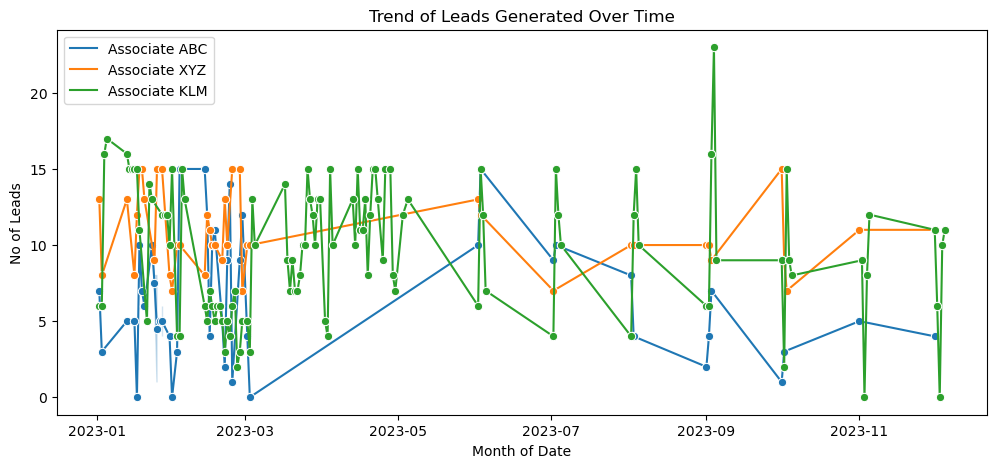

In [20]:
# Plot trends of leads generated and time spent over time
plt.figure(figsize=(12, 5))
sns.lineplot(x='Date', y='No of Leads', hue='Name', data=df, marker='o')
plt.title('Trend of Leads Generated Over Time')
plt.xlabel('Month of Date')
plt.ylabel('No of Leads')
plt.legend(loc='upper left')
plt.show()

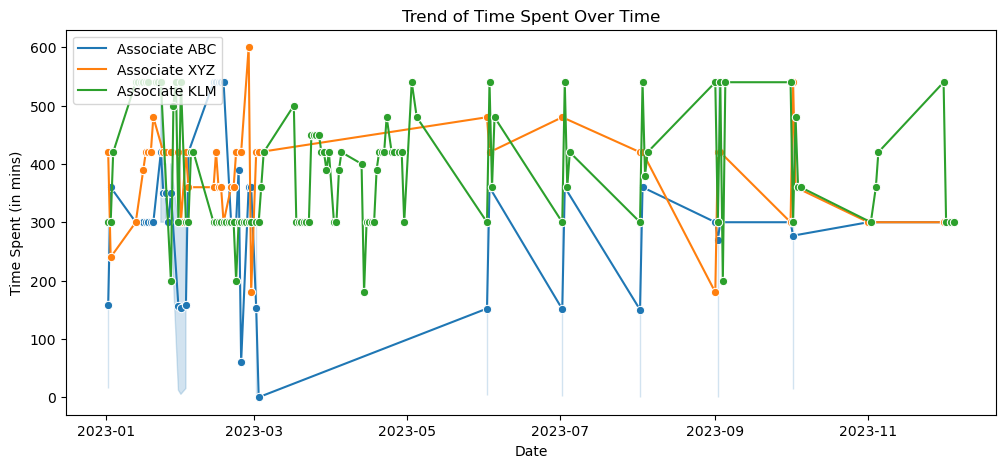

In [21]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='Date', y='Time Spent on LG (in mins)', hue='Name', data=df, marker='o')
plt.title('Trend of Time Spent Over Time')
plt.xlabel('Date')
plt.ylabel('Time Spent (in mins)')
plt.legend(loc='upper left')
plt.show()

In [22]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a new feature for day of the month
df['Day_of_Month'] = df['Date'].dt.day

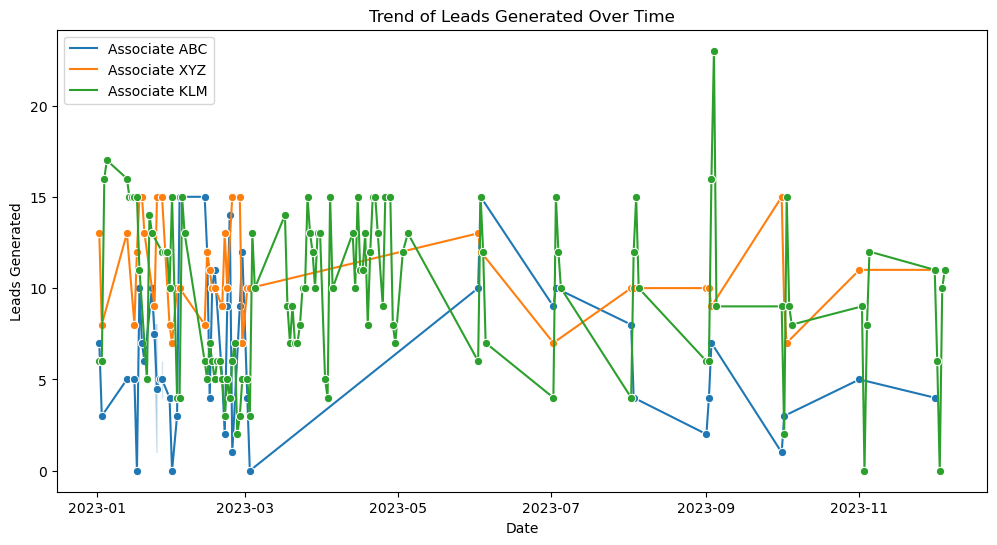

In [23]:
# Plot trends of leads generated and time spent over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='No of Leads', hue='Name', data=df, marker='o')
plt.title('Trend of Leads Generated Over Time')
plt.xlabel('Date')
plt.ylabel('Leads Generated')
plt.legend(loc='upper left')
plt.show()

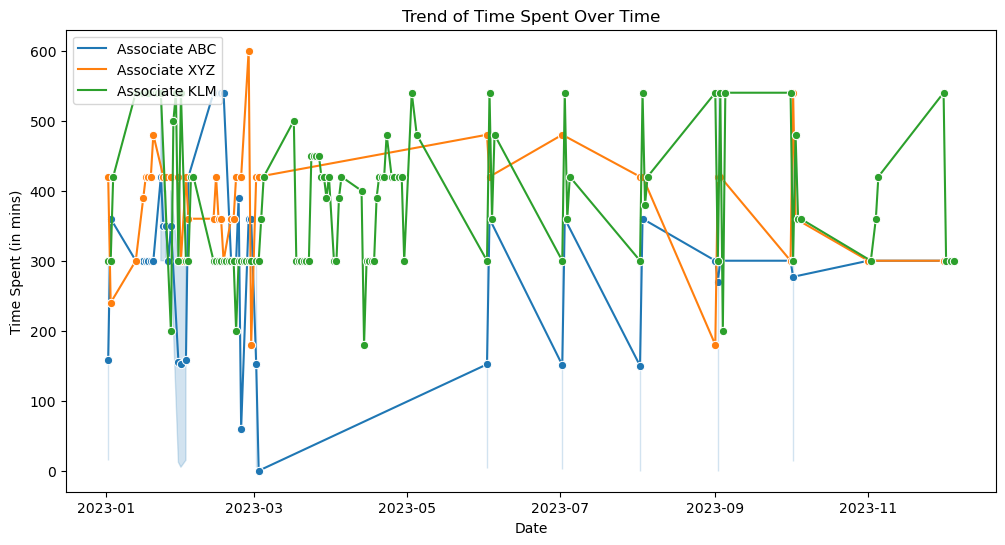

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Time Spent on LG (in mins)', hue='Name', data=df, marker='o')
plt.title('Trend of Time Spent Over Time')
plt.xlabel('Date')
plt.ylabel('Time Spent (in mins)')
plt.legend(loc='upper left')
plt.show()

In [25]:
X=new_df['Time Spent on LG (in mins)']
X

0      300.0
1      300.0
2      300.0
3      300.0
4      300.0
       ...  
262    420.0
263    540.0
264    360.0
265    420.0
266    300.0
Name: Time Spent on LG (in mins), Length: 196, dtype: float64

In [26]:
Y=new_df['No of Leads']
Y

0       2.0
1       1.0
2       5.0
3       4.0
4       5.0
       ... 
262    10.0
263     9.0
264     8.0
265    12.0
266    11.0
Name: No of Leads, Length: 196, dtype: float64

In [27]:
# Split the data for train and test 
X_train,X_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,random_state=100)

In [28]:
X_train.shape

(156,)

In [29]:
X_train=X_train.values.reshape(-1,1)
X_train

array([[360.],
       [180.],
       [420.],
       [300.],
       [240.],
       [300.],
       [540.],
       [540.],
       [300.],
       [360.],
       [420.],
       [300.],
       [450.],
       [360.],
       [300.],
       [360.],
       [300.],
       [300.],
       [420.],
       [360.],
       [300.],
       [420.],
       [540.],
       [540.],
       [200.],
       [390.],
       [420.],
       [300.],
       [300.],
       [480.],
       [540.],
       [390.],
       [420.],
       [360.],
       [480.],
       [300.],
       [300.],
       [300.],
       [390.],
       [300.],
       [300.],
       [380.],
       [360.],
       [400.],
       [480.],
       [400.],
       [420.],
       [420.],
       [540.],
       [300.],
       [  0.],
       [300.],
       [360.],
       [300.],
       [420.],
       [540.],
       [300.],
       [180.],
       [300.],
       [540.],
       [360.],
       [300.],
       [300.],
       [300.],
       [300.],
       [300.],
       [30

In [30]:
X_test=X_test.values.reshape(-1,1)

In [31]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred=lr.predict(X_test)

# Plotting the predictions

In [33]:
len(y_test)

40

In [34]:
x_range = [i for i in range(len(y_test))]

In [35]:
x_range

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39]

In [36]:
y_pred = lr.predict(X_test)

In [37]:
len(y_test)

40

In [38]:
x_range = [i for i in range(len(y_test))]

In [39]:
x_range

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39]

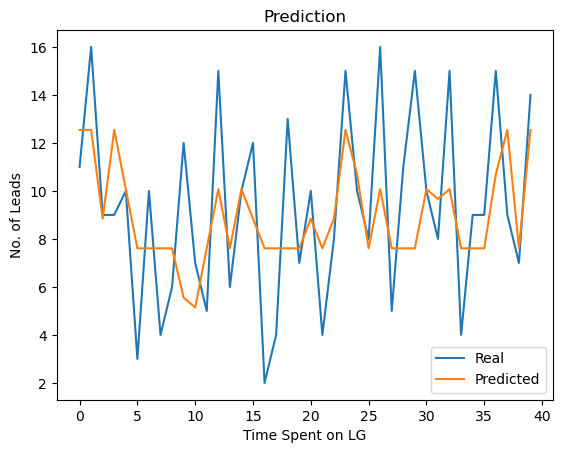

In [40]:
plt.xlabel('Time Spent on LG')
plt.ylabel('No. of Leads')
plt.title('Prediction')

plt.plot(x_range,y_test)
plt.plot(x_range,y_pred)

# Function add a legend  
plt.legend(["Real", "Predicted"])

In [41]:
# calculate Mean square error
mean_squared_error(y_test,y_pred)

10.983557871112316

In [42]:
mse = mean_squared_error(y_test,y_pred)

In [43]:
# Calculate R square vale
r2_score(y_test,y_pred)

0.26380576457711424

In [44]:
rsq = r2_score(y_test,y_pred)

In [45]:
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 10.983557871112316
r square : 0.26380576457711424


In [46]:
# Intecept and coeff of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: 1.4422215821944455
Coefficient of the line: [0.02055512]


In [ ]:
**THE END**